In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
df_train.drop('PassengerId',axis=1,inplace=True)
df_test.drop('PassengerId',axis=1,inplace=True)

In [6]:
df_train.drop('Cabin', axis = 1, inplace = True)
df_test.drop('Cabin', axis = 1, inplace = True)

In [7]:
df_train.drop('Name',axis=1,inplace=True)
df_test.drop('Name',axis=1,inplace=True)

In [8]:
df_train.drop('Ticket',axis=1,inplace=True)
df_test.drop('Ticket',axis=1,inplace=True)

In [9]:
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [10]:
df_train['Embarked'] = df_train['Embarked'].fillna(np.random.choice(a = ['S','C','Q'],p = [0.7244094488188977,0.1889763779527559,0.08661417322834646]))

In [11]:
df_train['Age'].fillna(df_train['Age'].value_counts().index[0], inplace=True)
df_test['Age'].fillna(df_test['Age'].value_counts().index[0], inplace=True)

In [12]:
df_test['Fare'].fillna(df_test['Fare'].value_counts().index[0], inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label = LabelEncoder()

In [15]:
for column in df_train.columns:
    if df_train[column].dtype == object:
        label = LabelEncoder()
        df_train[column] = label.fit_transform(df_train[column])
        df_test[column] = label.transform(df_test[column])

# LogisticRegression + Pipeline + StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression()

In [20]:
from sklearn.pipeline import Pipeline

In [21]:
pipe = Pipeline([('scaler', scaler), ('model', model)])

In [22]:
pipe

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [23]:
params = [
    {
        'model__penalty': ['l1'],
        'model__solver': ['liblinear', 'saga'],
        'model__max_iter': [100, 500, 1000]
    },
    {
        'model__penalty': ['l2'],
        'model__solver': ['liblinear', 'lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'model__max_iter': [100, 500, 1000]
    },
    {
        'model__penalty': ['elasticnet'],
        'model__solver': ['saga'],
        'model__max_iter': [100, 500, 1000],
        'model__l1_ratio': [0.15, 0.5, 0.85]
    },
    {
        'model__penalty': ['none'],
        'model__solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'model__max_iter': [100, 500, 1000]
    }
]


In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
final_model = GridSearchCV(pipe, param_grid=params, cv=3, scoring='accuracy',n_jobs=-1)

In [26]:
X_train = df_train.drop('Survived', axis = 1)
X_test = df_test.copy()
y_train = df_train['Survived']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [29]:
final_model.fit(X_train, y_train)

,estimator,Pipeline(step...egression())])
,param_grid,"[{'model__max_iter': [100, 500, ...], 'model__penalty': ['l1'], 'model__solver': ['liblinear', 'saga']}, {'model__max_iter': [100, 500, ...], 'model__penalty': ['l2'], 'model__solver': ['liblinear', 'lbfgs', ...]}, ...]"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [30]:
final_model.best_params_

{'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'liblinear'}

In [31]:
y_pred = final_model.predict(X_val)

In [32]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [33]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



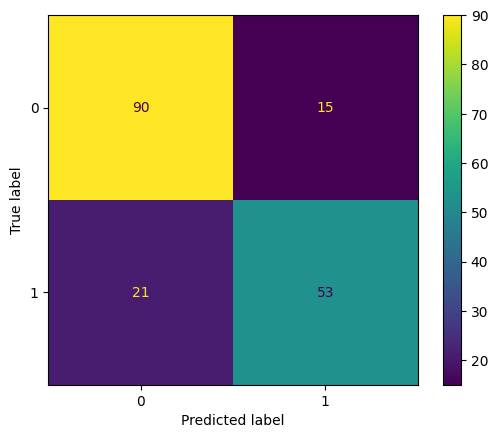

In [34]:
ConfusionMatrixDisplay(confusion_matrix(y_val, y_pred)).plot()

In [35]:
df_sub = pd.read_csv('gender_submission.csv')
finaly_y = final_model.predict(X_test)
df_sub['Survived'] = finaly_y
df_sub.to_csv('sub.csv', index=False, index_label=False)